# **Uber Classification Predict Booking Status**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, balanced_accuracy_score, log_loss
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    roc_curve, auc,
    precision_recall_curve, average_precision_score
)
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


In [ ]:
# Read data
df = pd.read_csv("/content/drive/MyDrive/Datasets/uber_cleaned_to_train.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 48 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Booking Status                             150000 non-null  object 
 1   Avg VTAT                                   150000 non-null  float64
 2   Avg CTAT                                   150000 non-null  float64
 3   Cancelled Rides by Customer                150000 non-null  float64
 4   Reason for cancelling by Customer          150000 non-null  int64  
 5   Cancelled Rides by Driver                  150000 non-null  float64
 6   Driver Cancellation Reason                 150000 non-null  int64  
 7   Incomplete Rides                           150000 non-null  float64
 8   Incomplete Rides Reason                    150000 non-null  int64  
 9   Booking Value                              150000 non-null  float64
 10  Ride Dis

In [ ]:
df.dtypes

,0
Booking Status,object
Avg VTAT,float64
Avg CTAT,float64
Cancelled Rides by Customer,float64
Reason for cancelling by Customer,int64
Cancelled Rides by Driver,float64
Driver Cancellation Reason,int64
Incomplete Rides,float64
Incomplete Rides Reason,int64
Booking Value,float64


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg VTAT,150000.0,8.410407,3.642944,2.000000,5.600000,7.800000,11.000000,20.000000
Avg CTAT,150000.0,26.861753,8.063314,10.000000,22.000000,22.000000,32.900000,45.000000
Cancelled Rides by Customer,150000.0,0.070000,0.255148,0.000000,0.000000,0.000000,0.000000,1.000000
Reason for cancelling by Customer,150000.0,4.805973,0.788389,0.000000,5.000000,5.000000,5.000000,5.000000
Cancelled Rides by Driver,150000.0,0.180000,0.384189,0.000000,0.000000,0.000000,0.000000,1.000000
Driver Cancellation Reason,150000.0,3.549273,1.073154,0.000000,4.000000,4.000000,4.000000,4.000000
Incomplete Rides,150000.0,0.060000,0.237488,0.000000,0.000000,0.000000,0.000000,1.000000
Incomplete Rides Reason,150000.0,2.879813,0.516382,0.000000,3.000000,3.000000,3.000000,3.000000
Booking Value,150000.0,508.295912,326.389291,50.000000,319.750000,508.295912,521.000000,4277.000000
Ride Distance,150000.0,24.637012,11.546441,1.000000,17.360000,24.637012,30.650000,50.000000


In [ ]:
df["Booking Status"].value_counts()

,count
Booking Status,
Completed,93000
Cancelled by Driver,27000
No Driver Found,10500
Cancelled by Customer,10500
Incomplete,9000


Completed: 93,000 (62%)

Cancelled by Driver: 27,000 (18%)

No Driver Found: 10,500 (7%)

Cancelled by Customer: 10,500 (7%)

Incomplete: 9,000 (6%)

In [ ]:
X = df.drop(columns=['Booking Status'] )
y = df['Booking Status']

split the data while keeping the same class proportions of y in both train and test.

Because target Booking Status is imbalanced (e.g., “Completed” much larger than others), a normal random split might accidentally put too few samples of a minority class (like Incomplete) into the test set (or even almost none). Stratification prevents that.

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [ ]:
sm = SMOTE(sampling_strategy='not majority')
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
log_reg =  Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=2000, solver="lbfgs"))
])

log_reg.fit(X_res, y_res)

y_train_pred = log_reg.predict(X_res)
y_test_pred  = log_reg.predict(X_test)

train_acc = accuracy_score(y_res, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy :", test_acc)

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix:\n", cm)

print("\nClassification report:\n", classification_report(y_test, y_test_pred))

Train accuracy: 1.0
Test accuracy : 1.0
Confusion matrix:
 [[ 2100     0     0     0     0]
 [    0  5400     0     0     0]
 [    0     0 18600     0     0]
 [    0     0     0  1800     0]
 [    0     0     0     0  2100]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2100
           1       1.00      1.00      1.00      5400
           2       1.00      1.00      1.00     18600
           3       1.00      1.00      1.00      1800
           4       1.00      1.00      1.00      2100

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



The model output is too perfect to be trusted. The most probable explanation is target leakage, meaning at least one input feature contains direct information about the booking outcome. Therefore, we should not interpret these metrics as real predictive performance until leakage is removed.

In [ ]:
leak_keywords = ["status","complete","cancel","reason","end","finish","dropoff",
                 "arrival","final","actual","paid","rating","refund"]

suspects = [c for c in X.columns if any(k in c.lower() for k in leak_keywords)]
print("Possible leakage columns:", suspects)

Possible leakage columns: ['Cancelled Rides by Customer', 'Reason for cancelling by Customer', 'Cancelled Rides by Driver', 'Driver Cancellation Reason', 'Incomplete Rides', 'Incomplete Rides Reason', 'Driver Ratings', 'Customer Rating', 'Cancelled Rides by Customer_missing', 'Cancelled Rides by Driver_missing', 'Incomplete Rides_missing', 'Reason for cancelling by Customer_missing', 'Driver Cancellation Reason_missing', 'Incomplete Rides Reason_missing', 'Is_Weekend', 'Is_Month_End']


In [ ]:
X = df.drop(columns=['Booking Status','Cancelled Rides by Customer', 'Reason for cancelling by Customer',
                     'Cancelled Rides by Driver', 'Driver Cancellation Reason', 'Incomplete Rides',
                     'Incomplete Rides Reason', 'Driver Ratings', 'Customer Rating',
                     'Cancelled Rides by Customer_missing', 'Cancelled Rides by Driver_missing',
                     'Incomplete Rides_missing', 'Reason for cancelling by Customer_missing',
                     'Driver Cancellation Reason_missing', 'Incomplete Rides Reason_missing',
                     'Is_Weekend', 'Is_Month_End'] )
y = df['Booking Status']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


# **LogisticRegression**

Train accuracy: 0.85975
Test accuracy : 0.8612
Confusion matrix:
 [[ 1373   727     0     0     0]
 [ 1121  4279     0     0     0]
 [    0     0 16864  1736     0]
 [    0     0   580  1220     0]
 [    0     0     0     0  2100]]

Classification report:
               precision    recall  f1-score   support

           0       0.55      0.65      0.60      2100
           1       0.85      0.79      0.82      5400
           2       0.97      0.91      0.94     18600
           3       0.41      0.68      0.51      1800
           4       1.00      1.00      1.00      2100

    accuracy                           0.86     30000
   macro avg       0.76      0.81      0.77     30000
weighted avg       0.89      0.86      0.87     30000

Macro F1: 0.7737855381539337
Balanced Acc: 0.8061322751322753
LogLoss: 0.28511701203764045
CV Accuracy      : 0.8595749999999999 +/- 0.0029365276168366837
CV Balanced Acc  : 0.8035900324287422 +/- 0.0043284476561394085
CV Macro F1      : 0.77156238921780

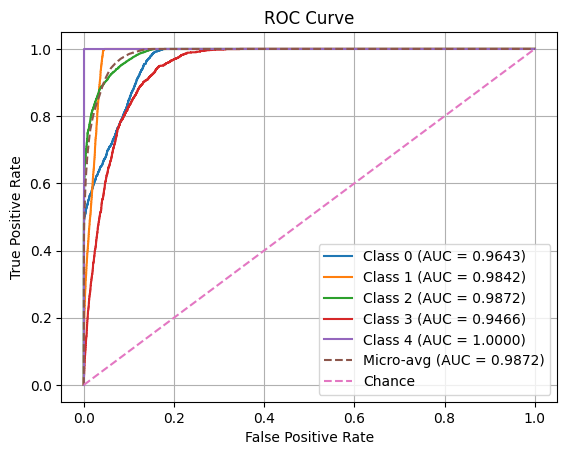

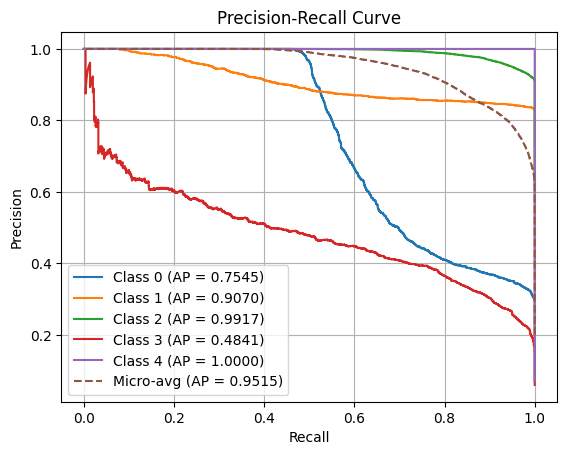

In [ ]:


log_reg=ImbPipeline([
    ("smote", SMOTE(sampling_strategy="not majority", random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=2000, solver="lbfgs"))
])

log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred  = log_reg.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy :", test_acc)

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix:\n", cm)

print("\nClassification report:\n", classification_report(y_test, y_test_pred))


print("Macro F1:", f1_score(y_test, y_test_pred, average="macro"))
print("Balanced Acc:", balanced_accuracy_score(y_test, y_test_pred))
print("LogLoss:", log_loss(y_test, log_reg.predict_proba(X_test)))




cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "acc": "accuracy",
    "bal_acc": make_scorer(balanced_accuracy_score),
    "macro_f1": make_scorer(f1_score, average="macro"),
    "weighted_f1": make_scorer(f1_score, average="weighted"),
    "neg_log_loss": "neg_log_loss"
}

cv_res = cross_validate(log_reg, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

print("CV Accuracy      :", cv_res["test_acc"].mean(), "+/-", cv_res["test_acc"].std())
print("CV Balanced Acc  :", cv_res["test_bal_acc"].mean(), "+/-", cv_res["test_bal_acc"].std())
print("CV Macro F1      :", cv_res["test_macro_f1"].mean(), "+/-", cv_res["test_macro_f1"].std())
print("CV Weighted F1   :", cv_res["test_weighted_f1"].mean(), "+/-", cv_res["test_weighted_f1"].std())
print("CV LogLoss       :", -cv_res["test_neg_log_loss"].mean(), "+/-", cv_res["test_neg_log_loss"].std())


classes = np.unique(y_train)
proba = log_reg.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=classes)

n_classes = len(classes)


# ============ ROC CURVE ============

plt.figure()
if n_classes == 2:
    # Use positive class probability (column 1)
    fpr, tpr, _ = roc_curve(y_test, proba[:, 1], pos_label=classes[1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.4f})")
else:
    # Per-class ROC
    for i, c in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {c} (AUC = {roc_auc:.4f})")

    # Micro-average ROC
    fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), proba.ravel())
    auc_micro = auc(fpr_micro, tpr_micro)
    plt.plot(fpr_micro, tpr_micro, linestyle="--", label=f"Micro-avg (AUC = {auc_micro:.4f})")

plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# ============ PR CURVE ============

plt.figure()
if n_classes == 2:
    precision, recall, _ = precision_recall_curve(y_test, proba[:, 1], pos_label=classes[1])
    ap = average_precision_score(y_test == classes[1], proba[:, 1])

    plt.plot(recall, precision, label=f"PR (AP = {ap:.4f})")
else:
    # Per-class PR
    ap_list = []
    for i, c in enumerate(classes):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], proba[:, i])
        ap = average_precision_score(y_test_bin[:, i], proba[:, i])
        ap_list.append(ap)
        plt.plot(recall, precision, label=f"Class {c} (AP = {ap:.4f})")

    # Micro-average PR
    precision_micro, recall_micro, _ = precision_recall_curve(y_test_bin.ravel(), proba.ravel())
    ap_micro = average_precision_score(y_test_bin.ravel(), proba.ravel())
    plt.plot(recall_micro, precision_micro, linestyle="--", label=f"Micro-avg (AP = {ap_micro:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

Classification report (per-class behavior)

.      Class 2: strong (F1 = 0.94) → the majority class is learned well.

.      Class 1: good (F1 = 0.82) but recall < 0.8, meaning it misses some true class-1 cases.

.      Class 0: moderate (F1 = 0.60) → lower precision means many predicted “0” are actually “1”.

.      Class 3: weakest (F1 = 0.51) → recall is decent (0.68) but precision is low (0.41), meaning the model over-predicts class 3 and produces many false positives.

.      Class 4: perfect (F1 = 1.00) → no errors on test.

The low standard deviations mean performance is stable, not dependent on one lucky split.

Even though class 3 ROC AUC is high, class 3 PR/AP is low → when the model predicts class 3, it’s often wrong (low precision). PR curves reveal this clearly because they focus on positive-class quality under imbalance.

In [ ]:
# calibrate using CV on the training set
calibrated = CalibratedClassifierCV(log_reg, method="isotonic", cv=3)
calibrated.fit(X_train, y_train)

proba_test = calibrated.predict_proba(X_test)
print("Calibrated LogLoss:", log_loss(y_test, proba_test))


Calibrated LogLoss: 0.227006159954318


# **CatBoostClassifier**

In [ ]:


cat=ImbPipeline([
    ("smote", SMOTE(sampling_strategy="not majority", random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass'
    ))
])

cat.fit(X_train, y_train)

y_train_pred = cat.predict(X_train)
y_test_pred  = cat.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy :", test_acc)

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix:\n", cm)

print("\nClassification report:\n", classification_report(y_test, y_test_pred))




0:	learn: 1.3107574	total: 312ms	remaining: 2m 35s
1:	learn: 1.1214060	total: 560ms	remaining: 2m 19s
2:	learn: 0.9845183	total: 828ms	remaining: 2m 17s
3:	learn: 0.8764894	total: 1.07s	remaining: 2m 13s
4:	learn: 0.7907466	total: 1.32s	remaining: 2m 10s
5:	learn: 0.7200462	total: 1.56s	remaining: 2m 8s
6:	learn: 0.6607822	total: 1.83s	remaining: 2m 9s
7:	learn: 0.6109788	total: 2.08s	remaining: 2m 7s
8:	learn: 0.5680986	total: 2.33s	remaining: 2m 6s
9:	learn: 0.5310264	total: 2.57s	remaining: 2m 5s
10:	learn: 0.4989999	total: 2.84s	remaining: 2m 6s
11:	learn: 0.4710531	total: 3.09s	remaining: 2m 5s
12:	learn: 0.4464359	total: 3.35s	remaining: 2m 5s
13:	learn: 0.4245829	total: 3.59s	remaining: 2m 4s
14:	learn: 0.4054064	total: 3.85s	remaining: 2m 4s
15:	learn: 0.3882387	total: 4.12s	remaining: 2m 4s
16:	learn: 0.3728729	total: 4.37s	remaining: 2m 4s
17:	learn: 0.3593077	total: 4.61s	remaining: 2m 3s
18:	learn: 0.3468743	total: 4.86s	remaining: 2m 2s
19:	learn: 0.3359937	total: 5.13s	re

Compared to Logistic Regression (~0.861 test accuracy), CatBoost gives a big jump to ~0.904, meaning it fits the complex patterns better.

Main patterns

Class 0 ↔ Class 1

The model rarely mistakes class 1 as class 0 (only 99 cases) → very strong recall for class 1.

But class 0 is still often predicted as class 1 (957 cases) → class 0 recall remains the hard part.

Class 2 ↔ Class 3

Still some mixing, but better than before overall.

Class 4

Still perfectly classified → consistently very separable.

Macro F1: 0.8281626905370757
Balanced Acc: 0.8417137736815157
LogLoss: 0.28511701203764045
CV Accuracy      : 0.9025916666666667 +/- 0.0019426499656111154
CV Balanced Acc  : 0.8375518433179723 +/- 0.004452483515842948
CV Macro F1      : 0.8253560257997539 +/- 0.0036016928481210106
CV Weighted F1   : 0.904822697270659 +/- 0.0018918757356081472
CV LogLoss       : 0.18850794588605177 +/- 0.002037574547238913


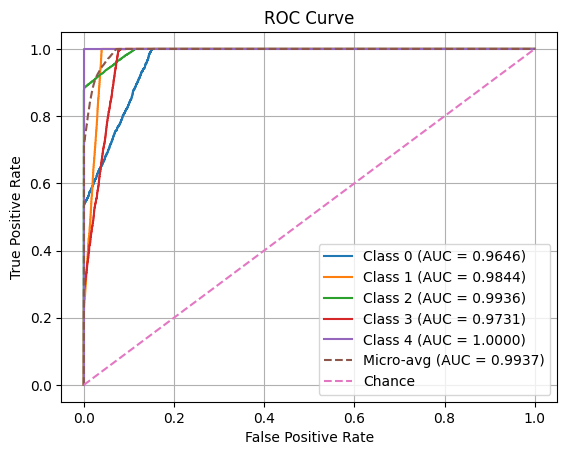

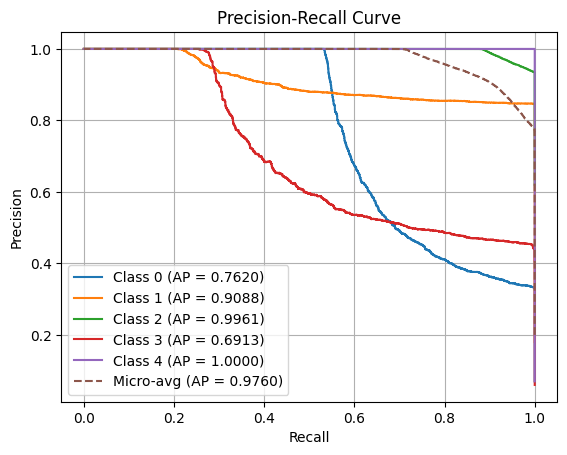

In [ ]:

print("Macro F1:", f1_score(y_test, y_test_pred, average="macro"))
print("Balanced Acc:", balanced_accuracy_score(y_test, y_test_pred))
print("LogLoss:", log_loss(y_test, cat.predict_proba(X_test)))



cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "acc": "accuracy",
    "bal_acc": make_scorer(balanced_accuracy_score),
    "macro_f1": make_scorer(f1_score, average="macro"),
    "weighted_f1": make_scorer(f1_score, average="weighted"),
    "neg_log_loss": "neg_log_loss"
}

cv_res = cross_validate(cat, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

print("CV Accuracy      :", cv_res["test_acc"].mean(), "+/-", cv_res["test_acc"].std())
print("CV Balanced Acc  :", cv_res["test_bal_acc"].mean(), "+/-", cv_res["test_bal_acc"].std())
print("CV Macro F1      :", cv_res["test_macro_f1"].mean(), "+/-", cv_res["test_macro_f1"].std())
print("CV Weighted F1   :", cv_res["test_weighted_f1"].mean(), "+/-", cv_res["test_weighted_f1"].std())
print("CV LogLoss       :", -cv_res["test_neg_log_loss"].mean(), "+/-", cv_res["test_neg_log_loss"].std())


classes = np.unique(y_train)
proba = cat.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=classes)

n_classes = len(classes)


# ============ ROC CURVE ============

plt.figure()
if n_classes == 2:
    # Use positive class probability (column 1)
    fpr, tpr, _ = roc_curve(y_test, proba[:, 1], pos_label=classes[1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.4f})")
else:
    # Per-class ROC
    for i, c in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {c} (AUC = {roc_auc:.4f})")

    # Micro-average ROC
    fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), proba.ravel())
    auc_micro = auc(fpr_micro, tpr_micro)
    plt.plot(fpr_micro, tpr_micro, linestyle="--", label=f"Micro-avg (AUC = {auc_micro:.4f})")

plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# ============ PR CURVE ============

plt.figure()
if n_classes == 2:
    precision, recall, _ = precision_recall_curve(y_test, proba[:, 1], pos_label=classes[1])
    ap = average_precision_score(y_test == classes[1], proba[:, 1])

    plt.plot(recall, precision, label=f"PR (AP = {ap:.4f})")
else:
    # Per-class PR
    ap_list = []
    for i, c in enumerate(classes):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], proba[:, i])
        ap = average_precision_score(y_test_bin[:, i], proba[:, i])
        ap_list.append(ap)
        plt.plot(recall, precision, label=f"Class {c} (AP = {ap:.4f})")

    # Micro-average PR
    precision_micro, recall_micro, _ = precision_recall_curve(y_test_bin.ravel(), proba.ravel())
    ap_micro = average_precision_score(y_test_bin.ravel(), proba.ravel())
    plt.plot(recall_micro, precision_micro, linestyle="--", label=f"Micro-avg (AP = {ap_micro:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

# **DecisionTreeClassifier**

Train accuracy: 0.8978083333333333
Test accuracy : 0.8952
Confusion matrix:
 [[ 1123   977     0     0     0]
 [   37  5363     0     0     0]
 [    0     0 16499  2101     0]
 [    0     0    29  1771     0]
 [    0     0     0     0  2100]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.53      0.69      2100
           1       0.85      0.99      0.91      5400
           2       1.00      0.89      0.94     18600
           3       0.46      0.98      0.62      1800
           4       1.00      1.00      1.00      2100

    accuracy                           0.90     30000
   macro avg       0.85      0.88      0.83     30000
weighted avg       0.94      0.90      0.90     30000

Macro F1: 0.8332842741563973
Balanced Acc: 0.879768390510326
LogLoss: 0.26130747895928924
CV Accuracy      : 0.895825 +/- 0.002491569117376993
CV Balanced Acc  : 0.8717593872674518 +/- 0.004070267098572738
CV Macro F1      : 0.8306319955655214

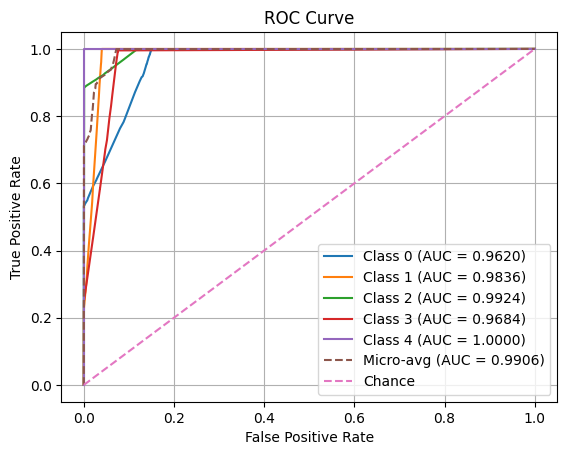

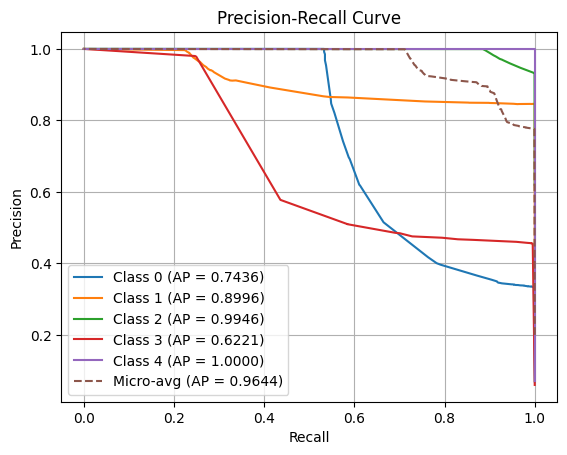

In [ ]:


dt=ImbPipeline([
    ("smote", SMOTE(sampling_strategy="not majority", random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", DecisionTreeClassifier(max_depth=10, random_state=42))
])

dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_test_pred  = dt.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy :", test_acc)

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix:\n", cm)

print("\nClassification report:\n", classification_report(y_test, y_test_pred))



print("Macro F1:", f1_score(y_test, y_test_pred, average="macro"))
print("Balanced Acc:", balanced_accuracy_score(y_test, y_test_pred))
print("LogLoss:", log_loss(y_test, dt.predict_proba(X_test)))


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "acc": "accuracy",
    "bal_acc": make_scorer(balanced_accuracy_score),
    "macro_f1": make_scorer(f1_score, average="macro"),
    "weighted_f1": make_scorer(f1_score, average="weighted"),
    "neg_log_loss": "neg_log_loss"
}

cv_res = cross_validate(dt, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

print("CV Accuracy      :", cv_res["test_acc"].mean(), "+/-", cv_res["test_acc"].std())
print("CV Balanced Acc  :", cv_res["test_bal_acc"].mean(), "+/-", cv_res["test_bal_acc"].std())
print("CV Macro F1      :", cv_res["test_macro_f1"].mean(), "+/-", cv_res["test_macro_f1"].std())
print("CV Weighted F1   :", cv_res["test_weighted_f1"].mean(), "+/-", cv_res["test_weighted_f1"].std())
print("CV LogLoss       :", -cv_res["test_neg_log_loss"].mean(), "+/-", cv_res["test_neg_log_loss"].std())



classes = np.unique(y_train)
proba = dt.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=classes)

n_classes = len(classes)


# ============ ROC CURVE ============

plt.figure()
if n_classes == 2:
    # Use positive class probability (column 1)
    fpr, tpr, _ = roc_curve(y_test, proba[:, 1], pos_label=classes[1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.4f})")
else:
    # Per-class ROC
    for i, c in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {c} (AUC = {roc_auc:.4f})")

    # Micro-average ROC
    fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), proba.ravel())
    auc_micro = auc(fpr_micro, tpr_micro)
    plt.plot(fpr_micro, tpr_micro, linestyle="--", label=f"Micro-avg (AUC = {auc_micro:.4f})")

plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# ============ PR CURVE ============

plt.figure()
if n_classes == 2:
    precision, recall, _ = precision_recall_curve(y_test, proba[:, 1], pos_label=classes[1])
    ap = average_precision_score(y_test == classes[1], proba[:, 1])

    plt.plot(recall, precision, label=f"PR (AP = {ap:.4f})")
else:
    # Per-class PR
    ap_list = []
    for i, c in enumerate(classes):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], proba[:, i])
        ap = average_precision_score(y_test_bin[:, i], proba[:, i])
        ap_list.append(ap)
        plt.plot(recall, precision, label=f"Class {c} (AP = {ap:.4f})")

    # Micro-average PR
    precision_micro, recall_micro, _ = precision_recall_curve(y_test_bin.ravel(), proba.ravel())
    ap_micro = average_precision_score(y_test_bin.ravel(), proba.ravel())
    plt.plot(recall_micro, precision_micro, linestyle="--", label=f"Micro-avg (AP = {ap_micro:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

This test accuracy is:

much better than Logistic Regression (~0.861)

slightly below CatBoost (~0.904)

Confusion matrix
Class 0 ↔ Class 1: Similar to CatBoost, the model often predicts class 0 as class 1 (977).

Class 2 ↔ Class 3: The largest error is class 2 → class 3 (2101), meaning the model sometimes confuses those two outcomes.

# **RandomForestClassifier**

Train accuracy: 0.899975
Test accuracy : 0.8963
Confusion matrix:
 [[ 1121   979     0     0     0]
 [   13  5387     0     0     0]
 [    0     0 16531  2069     0]
 [    0     0    50  1750     0]
 [    0     0     0     0  2100]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.53      0.69      2100
           1       0.85      1.00      0.92      5400
           2       1.00      0.89      0.94     18600
           3       0.46      0.97      0.62      1800
           4       1.00      1.00      1.00      2100

    accuracy                           0.90     30000
   macro avg       0.86      0.88      0.83     30000
weighted avg       0.94      0.90      0.90     30000

Macro F1: 0.8343207311506065
Balanced Acc: 0.8784775558969107
LogLoss: 0.2496037350626769


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


CV Accuracy      : 0.8972333333333333 +/- 0.001719899867886345
CV Balanced Acc  : 0.8784900580303805 +/- 0.0021365937472864363
CV Macro F1      : 0.8348822561209642 +/- 0.0024486589796523985
CV Weighted F1   : 0.9040433152568882 +/- 0.0014972118623912203
CV LogLoss       : 0.2482082520508658 +/- 0.0015321156914610415


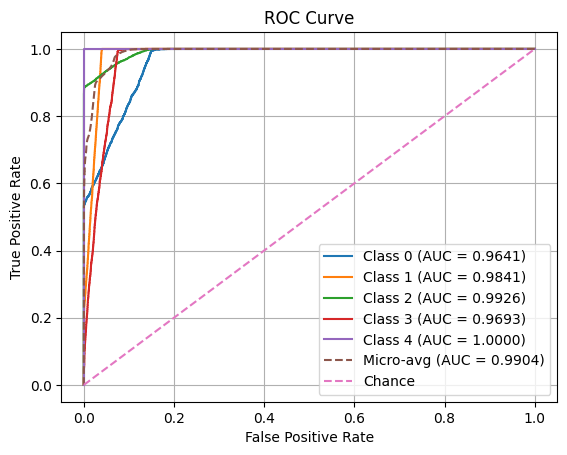

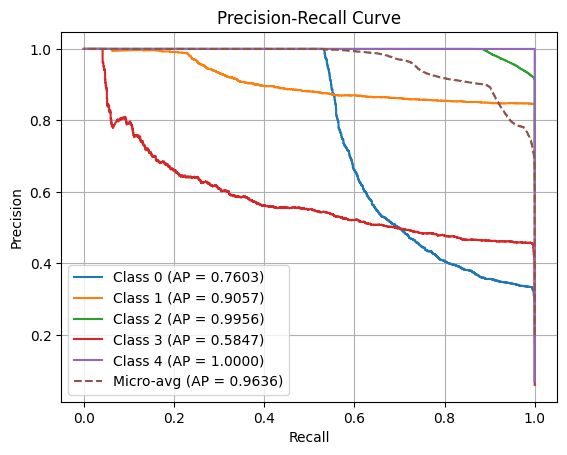

In [ ]:


rf=ImbPipeline([
    ("smote", SMOTE(sampling_strategy="not majority", random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(n_estimators=300, max_depth=12, random_state=42))
])

rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred  = rf.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy :", test_acc)

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix:\n", cm)

print("\nClassification report:\n", classification_report(y_test, y_test_pred))



print("Macro F1:", f1_score(y_test, y_test_pred, average="macro"))
print("Balanced Acc:", balanced_accuracy_score(y_test, y_test_pred))
print("LogLoss:", log_loss(y_test, rf.predict_proba(X_test)))



cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "acc": "accuracy",
    "bal_acc": make_scorer(balanced_accuracy_score),
    "macro_f1": make_scorer(f1_score, average="macro"),
    "weighted_f1": make_scorer(f1_score, average="weighted"),
    "neg_log_loss": "neg_log_loss"
}

cv_res = cross_validate(rf, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

print("CV Accuracy      :", cv_res["test_acc"].mean(), "+/-", cv_res["test_acc"].std())
print("CV Balanced Acc  :", cv_res["test_bal_acc"].mean(), "+/-", cv_res["test_bal_acc"].std())
print("CV Macro F1      :", cv_res["test_macro_f1"].mean(), "+/-", cv_res["test_macro_f1"].std())
print("CV Weighted F1   :", cv_res["test_weighted_f1"].mean(), "+/-", cv_res["test_weighted_f1"].std())
print("CV LogLoss       :", -cv_res["test_neg_log_loss"].mean(), "+/-", cv_res["test_neg_log_loss"].std())



classes = np.unique(y_train)
proba = rf.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=classes)

n_classes = len(classes)


# ============ ROC CURVE ============

plt.figure()
if n_classes == 2:
    # Use positive class probability (column 1)
    fpr, tpr, _ = roc_curve(y_test, proba[:, 1], pos_label=classes[1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.4f})")
else:
    # Per-class ROC
    for i, c in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {c} (AUC = {roc_auc:.4f})")

    # Micro-average ROC
    fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), proba.ravel())
    auc_micro = auc(fpr_micro, tpr_micro)
    plt.plot(fpr_micro, tpr_micro, linestyle="--", label=f"Micro-avg (AUC = {auc_micro:.4f})")

plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# ============ PR CURVE ============

plt.figure()
if n_classes == 2:
    precision, recall, _ = precision_recall_curve(y_test, proba[:, 1], pos_label=classes[1])
    ap = average_precision_score(y_test == classes[1], proba[:, 1])

    plt.plot(recall, precision, label=f"PR (AP = {ap:.4f})")
else:
    # Per-class PR
    ap_list = []
    for i, c in enumerate(classes):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], proba[:, i])
        ap = average_precision_score(y_test_bin[:, i], proba[:, i])
        ap_list.append(ap)
        plt.plot(recall, precision, label=f"Class {c} (AP = {ap:.4f})")

    # Micro-average PR
    precision_micro, recall_micro, _ = precision_recall_curve(y_test_bin.ravel(), proba.ravel())
    ap_micro = average_precision_score(y_test_bin.ravel(), proba.ravel())
    plt.plot(recall_micro, precision_micro, linestyle="--", label=f"Micro-avg (AP = {ap_micro:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

Classification report

Class 0: Precision 0.99, Recall 0.53, F1 0.69
Very high precision means predictions of class 0 are almost always correct, but recall is low → many class-0 cases are missed.

Class 1: Precision 0.85, Recall 1.00, F1 0.92
Excellent recall: it catches nearly all class-1 cases.

Class 2: Precision 1.00, Recall 0.89, F1 0.94
Very clean when predicting class 2, but still misses some (usually predicts them as class 3).

Class 3: Precision 0.46, Recall 0.97, F1 0.62
Same story as the Decision Tree: very high recall but low precision → lots of false positives for class 3.

Class 4: perfect.

# **XGBClassifier**

Train accuracy: 0.9320083333333333
Test accuracy : 0.9053666666666667
Confusion matrix:
 [[ 1180   920     0     0     0]
 [  237  5163     0     0     0]
 [    0     0 17566  1034     0]
 [    0     0   648  1152     0]
 [    0     0     0     0  2100]]

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.56      0.67      2100
           1       0.85      0.96      0.90      5400
           2       0.96      0.94      0.95     18600
           3       0.53      0.64      0.58      1800
           4       1.00      1.00      1.00      2100

    accuracy                           0.91     30000
   macro avg       0.83      0.82      0.82     30000
weighted avg       0.91      0.91      0.91     30000

Macro F1: 0.8205205484083168
Balanced Acc: 0.820484895033282
LogLoss: 0.18329766737014477
CV Accuracy      : 0.9030250000000001 +/- 0.002704625667259693
CV Balanced Acc  : 0.8160036695681857 +/- 0.007130242187903118
CV Macro F1    

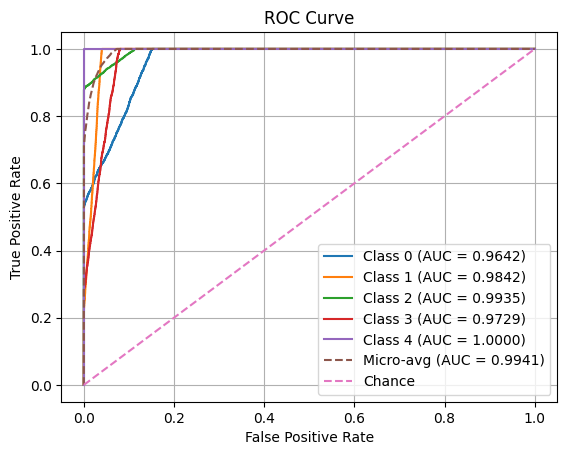

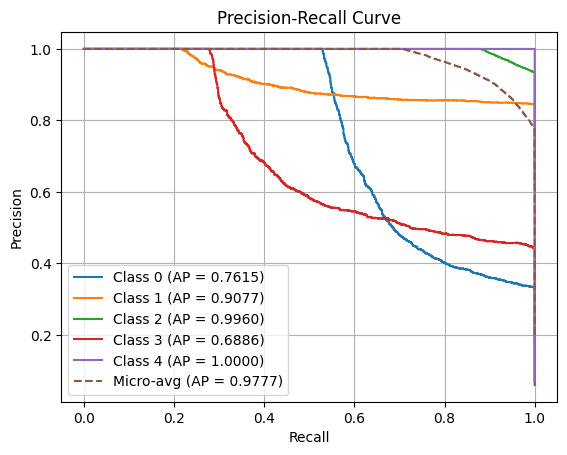

In [ ]:


xgb=ImbPipeline([
    ("smote", SMOTE(sampling_strategy="not majority", random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", XGBClassifier(objective='multi:softprob'))
])

xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred  = xgb.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy :", test_acc)

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix:\n", cm)

print("\nClassification report:\n", classification_report(y_test, y_test_pred))



print("Macro F1:", f1_score(y_test, y_test_pred, average="macro"))
print("Balanced Acc:", balanced_accuracy_score(y_test, y_test_pred))
print("LogLoss:", log_loss(y_test, xgb.predict_proba(X_test)))


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "acc": "accuracy",
    "bal_acc": make_scorer(balanced_accuracy_score),
    "macro_f1": make_scorer(f1_score, average="macro"),
    "weighted_f1": make_scorer(f1_score, average="weighted"),
    "neg_log_loss": "neg_log_loss"
}

cv_res = cross_validate(xgb, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

print("CV Accuracy      :", cv_res["test_acc"].mean(), "+/-", cv_res["test_acc"].std())
print("CV Balanced Acc  :", cv_res["test_bal_acc"].mean(), "+/-", cv_res["test_bal_acc"].std())
print("CV Macro F1      :", cv_res["test_macro_f1"].mean(), "+/-", cv_res["test_macro_f1"].std())
print("CV Weighted F1   :", cv_res["test_weighted_f1"].mean(), "+/-", cv_res["test_weighted_f1"].std())
print("CV LogLoss       :", -cv_res["test_neg_log_loss"].mean(), "+/-", cv_res["test_neg_log_loss"].std())



classes = np.unique(y_train)
proba = xgb.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=classes)

n_classes = len(classes)


# ============ ROC CURVE ============

plt.figure()
if n_classes == 2:
    # Use positive class probability (column 1)
    fpr, tpr, _ = roc_curve(y_test, proba[:, 1], pos_label=classes[1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.4f})")
else:
    # Per-class ROC
    for i, c in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {c} (AUC = {roc_auc:.4f})")

    # Micro-average ROC
    fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), proba.ravel())
    auc_micro = auc(fpr_micro, tpr_micro)
    plt.plot(fpr_micro, tpr_micro, linestyle="--", label=f"Micro-avg (AUC = {auc_micro:.4f})")

plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# ============ PR CURVE ============

plt.figure()
if n_classes == 2:
    precision, recall, _ = precision_recall_curve(y_test, proba[:, 1], pos_label=classes[1])
    ap = average_precision_score(y_test == classes[1], proba[:, 1])

    plt.plot(recall, precision, label=f"PR (AP = {ap:.4f})")
else:
    # Per-class PR
    ap_list = []
    for i, c in enumerate(classes):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], proba[:, i])
        ap = average_precision_score(y_test_bin[:, i], proba[:, i])
        ap_list.append(ap)
        plt.plot(recall, precision, label=f"Class {c} (AP = {ap:.4f})")

    # Micro-average PR
    precision_micro, recall_micro, _ = precision_recall_curve(y_test_bin.ravel(), proba.ravel())
    ap_micro = average_precision_score(y_test_bin.ravel(), proba.ravel())
    plt.plot(recall_micro, precision_micro, linestyle="--", label=f"Micro-avg (AP = {ap_micro:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

Train is noticeably higher than test → some overfitting, which is common for boosting models when hyperparameters are not tuned (default XGBoost can fit hard).
Still, test accuracy is close to CatBoost.

# **LGBMClassifier**

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.142200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2174
[LightGBM] [Info] Number of data points in the train set: 372000, number of used features: 31
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Train accuracy: 0.9592166666666667
Test accuracy : 0.9075333333333333
Confusion matrix:
 [[ 1154   946     0     0     0]
 [  173  5227     0     0     0]
 [    0     0 17747   853     0]
 [    0     0   802   998     0]
 [    0     0     0     0  2100]]

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.55      0.67      2100
           1       0.85      0.97      0.90      5400
           2       0.96      0.95      0.96     18600
           3       0.54      0.55      0.55      1800
           4       1.00      1.00      1.00      2100

    accuracy                           0.91     30000
   macro avg       0.84      0.81      0.82     30000
weighted avg       0.91      0.91      0.90     30000

Macro F1: 0.8157867959970059
Balanced Acc: 0.8052142003754905


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LogLoss: 0.1791271165646909
CV Accuracy      : 0.9071083333333334 +/- 0.0015591575360502398
CV Balanced Acc  : 0.8054553678102065 +/- 0.004808187481486533
CV Macro F1      : 0.815421426101938 +/- 0.0037865243524380023
CV Weighted F1   : 0.9046300383947488 +/- 0.0017800163582087712
CV LogLoss       : 0.17925380352445613 +/- 0.0019498326666416079


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


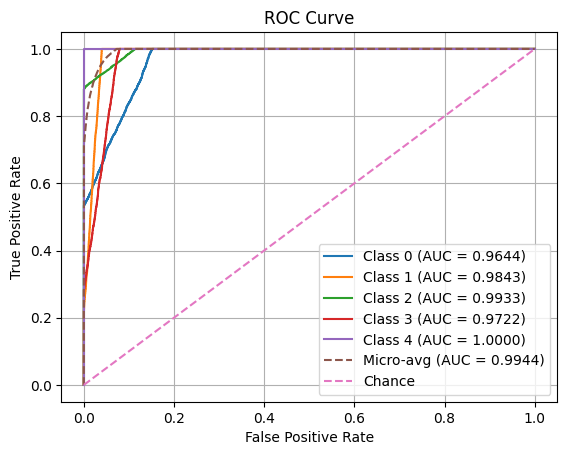

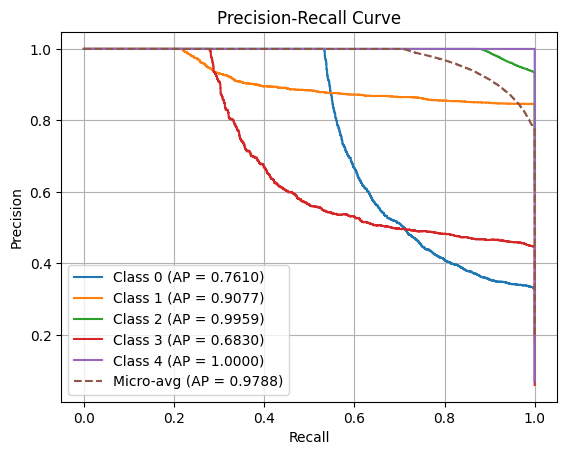

In [ ]:


lgb=ImbPipeline([
    ("smote", SMOTE(sampling_strategy="not majority", random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    random_state=42
))
])

lgb.fit(X_train, y_train)

y_train_pred = lgb.predict(X_train)
y_test_pred  = lgb.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy :", test_acc)

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix:\n", cm)

print("\nClassification report:\n", classification_report(y_test, y_test_pred))



print("Macro F1:", f1_score(y_test, y_test_pred, average="macro"))
print("Balanced Acc:", balanced_accuracy_score(y_test, y_test_pred))
print("LogLoss:", log_loss(y_test, lgb.predict_proba(X_test)))


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "acc": "accuracy",
    "bal_acc": make_scorer(balanced_accuracy_score),
    "macro_f1": make_scorer(f1_score, average="macro"),
    "weighted_f1": make_scorer(f1_score, average="weighted"),
    "neg_log_loss": "neg_log_loss"
}

cv_res = cross_validate(lgb, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

print("CV Accuracy      :", cv_res["test_acc"].mean(), "+/-", cv_res["test_acc"].std())
print("CV Balanced Acc  :", cv_res["test_bal_acc"].mean(), "+/-", cv_res["test_bal_acc"].std())
print("CV Macro F1      :", cv_res["test_macro_f1"].mean(), "+/-", cv_res["test_macro_f1"].std())
print("CV Weighted F1   :", cv_res["test_weighted_f1"].mean(), "+/-", cv_res["test_weighted_f1"].std())
print("CV LogLoss       :", -cv_res["test_neg_log_loss"].mean(), "+/-", cv_res["test_neg_log_loss"].std())


classes = np.unique(y_train)
proba = lgb.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=classes)

n_classes = len(classes)


# ============ ROC CURVE ============

plt.figure()
if n_classes == 2:
    # Use positive class probability (column 1)
    fpr, tpr, _ = roc_curve(y_test, proba[:, 1], pos_label=classes[1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.4f})")
else:
    # Per-class ROC
    for i, c in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {c} (AUC = {roc_auc:.4f})")

    # Micro-average ROC
    fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), proba.ravel())
    auc_micro = auc(fpr_micro, tpr_micro)
    plt.plot(fpr_micro, tpr_micro, linestyle="--", label=f"Micro-avg (AUC = {auc_micro:.4f})")

plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# ============ PR CURVE ============

plt.figure()
if n_classes == 2:
    precision, recall, _ = precision_recall_curve(y_test, proba[:, 1], pos_label=classes[1])
    ap = average_precision_score(y_test == classes[1], proba[:, 1])

    plt.plot(recall, precision, label=f"PR (AP = {ap:.4f})")
else:
    # Per-class PR
    ap_list = []
    for i, c in enumerate(classes):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], proba[:, i])
        ap = average_precision_score(y_test_bin[:, i], proba[:, i])
        ap_list.append(ap)
        plt.plot(recall, precision, label=f"Class {c} (AP = {ap:.4f})")

    # Micro-average PR
    precision_micro, recall_micro, _ = precision_recall_curve(y_test_bin.ravel(), proba.ravel())
    ap_micro = average_precision_score(y_test_bin.ravel(), proba.ravel())
    plt.plot(recall_micro, precision_micro, linestyle="--", label=f"Micro-avg (AP = {ap_micro:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

The train accuracy is much higher than test → clear overfitting (common with boosted trees if regularization/early stopping isn’t tuned).
Still, test accuracy is strong and comparable to XGBoost.

Confusion matrix
Class 0 ↔ 1: still the biggest confusion is class 0 being predicted as class 1 (946).

Class 2 ↔ 3: class 3 is heavily confused with class 2 (802), and some class 2 goes to class 3 (853).

Class 4: again perfectly separated.

So LightGBM behaves similarly to XGBoost in the tough class pairs, but it struggles more on class 3 recall/precision balance.

# **KNeighborsClassifier**

Train accuracy: 0.9206166666666666
Test accuracy : 0.8401333333333333
Confusion matrix:
 [[ 1214   886     0     0     0]
 [ 1206  4194     0     0     0]
 [    2     0 16642  1956     0]
 [    0     0   746  1054     0]
 [    0     0     0     0  2100]]

Classification report:
               precision    recall  f1-score   support

           0       0.50      0.58      0.54      2100
           1       0.83      0.78      0.80      5400
           2       0.96      0.89      0.92     18600
           3       0.35      0.59      0.44      1800
           4       1.00      1.00      1.00      2100

    accuracy                           0.84     30000
   macro avg       0.73      0.77      0.74     30000
weighted avg       0.87      0.84      0.85     30000

Macro F1: 0.740085944568941
Balanced Acc: 0.767009728622632
LogLoss: 1.6135279446340753
CV Accuracy      : 0.8396333333333335 +/- 0.002401590907896044
CV Balanced Acc  : 0.7642405273937531 +/- 0.00429925951518184
CV Macro F1      :

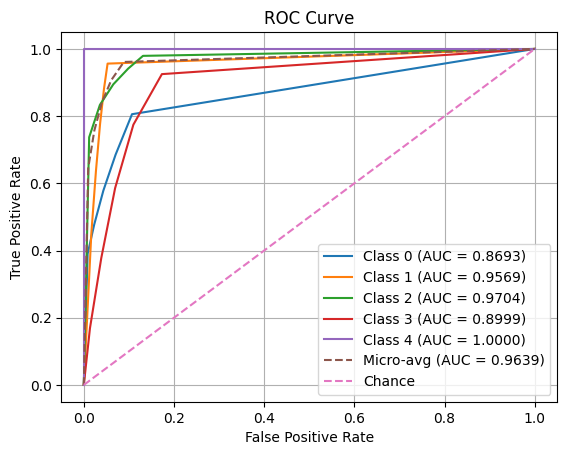

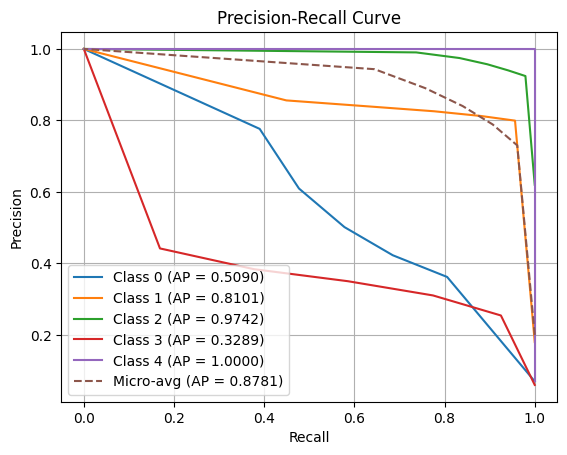

In [ ]:

knn=ImbPipeline([
    ("smote", SMOTE(sampling_strategy="not majority", random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors=5))
])

knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred  = knn.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy :", test_acc)

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix:\n", cm)

print("\nClassification report:\n", classification_report(y_test, y_test_pred))



print("Macro F1:", f1_score(y_test, y_test_pred, average="macro"))
print("Balanced Acc:", balanced_accuracy_score(y_test, y_test_pred))
print("LogLoss:", log_loss(y_test, knn.predict_proba(X_test)))



cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "acc": "accuracy",
    "bal_acc": make_scorer(balanced_accuracy_score),
    "macro_f1": make_scorer(f1_score, average="macro"),
    "weighted_f1": make_scorer(f1_score, average="weighted"),
    "neg_log_loss": "neg_log_loss"
}

cv_res = cross_validate(knn, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

print("CV Accuracy      :", cv_res["test_acc"].mean(), "+/-", cv_res["test_acc"].std())
print("CV Balanced Acc  :", cv_res["test_bal_acc"].mean(), "+/-", cv_res["test_bal_acc"].std())
print("CV Macro F1      :", cv_res["test_macro_f1"].mean(), "+/-", cv_res["test_macro_f1"].std())
print("CV Weighted F1   :", cv_res["test_weighted_f1"].mean(), "+/-", cv_res["test_weighted_f1"].std())
print("CV LogLoss       :", -cv_res["test_neg_log_loss"].mean(), "+/-", cv_res["test_neg_log_loss"].std())


classes = np.unique(y_train)
proba = knn.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=classes)

n_classes = len(classes)


# ============ ROC CURVE ============

plt.figure()
if n_classes == 2:
    # Use positive class probability (column 1)
    fpr, tpr, _ = roc_curve(y_test, proba[:, 1], pos_label=classes[1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.4f})")
else:
    # Per-class ROC
    for i, c in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {c} (AUC = {roc_auc:.4f})")

    # Micro-average ROC
    fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), proba.ravel())
    auc_micro = auc(fpr_micro, tpr_micro)
    plt.plot(fpr_micro, tpr_micro, linestyle="--", label=f"Micro-avg (AUC = {auc_micro:.4f})")

plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# ============ PR CURVE ============

plt.figure()
if n_classes == 2:
    precision, recall, _ = precision_recall_curve(y_test, proba[:, 1], pos_label=classes[1])
    ap = average_precision_score(y_test == classes[1], proba[:, 1])

    plt.plot(recall, precision, label=f"PR (AP = {ap:.4f})")
else:
    # Per-class PR
    ap_list = []
    for i, c in enumerate(classes):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], proba[:, i])
        ap = average_precision_score(y_test_bin[:, i], proba[:, i])
        ap_list.append(ap)
        plt.plot(recall, precision, label=f"Class {c} (AP = {ap:.4f})")

    # Micro-average PR
    precision_micro, recall_micro, _ = precision_recall_curve(y_test_bin.ravel(), proba.ravel())
    ap_micro = average_precision_score(y_test_bin.ravel(), proba.ravel())
    plt.plot(recall_micro, precision_micro, linestyle="--", label=f"Micro-avg (AP = {ap_micro:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

This is a large drop from train to test → KNN is overfitting here.
KNN can memorize the training space (especially after SMOTE creates synthetic neighbors), but it often struggles to generalize well on large, noisy, multi-class tabular data.

Class 0 ↔ 1 confusion is very high in both directions (886 and 1206).
That indicates KNN struggles to separate those two classes in the scaled feature space.

Class 2 ↔ 3 confusion is also large (1956 and 746).

Class 4 remains perfectly detected.

Classification report

Class 0: Precision 0.50, Recall 0.58, F1 0.54 (weak)

Class 1: F1 0.80 (decent, but worse than tree/boosting models)

Class 2: F1 0.92 (still strong because it’s dominant + separable)

Class 3: Precision 0.35, Recall 0.59, F1 0.44 (worst class)

Class 4: perfect again

Overall

Macro F1 = 0.740

Balanced Accuracy = 0.767

These are significantly lower than CatBoost / XGBoost / LightGBM / RF / DT, meaning KNN is not competitive for this dataset.

KNN performs poorly here because:

the dataset is large + multi-class + overlapping classes,

SMOTE can distort local neighborhoods,

KNN is sensitive to noise and the “curse of dimensionality”,

and its probability estimates are not reliable (high LogLoss).

Conclusion: KNN is not a good choice for this problem. Boosted tree models (LightGBM/XGBoost/CatBoost) are clearly superior both in classification quality and probability quality.

# **GaussianNB**

Train accuracy: 0.8482333333333333
Test accuracy : 0.8489333333333333
Confusion matrix:
 [[ 1295   805     0     0     0]
 [  924  4476     0     0     0]
 [    0     0 16126  2474     0]
 [    0     0   329  1471     0]
 [    0     0     0     0  2100]]

Classification report:
               precision    recall  f1-score   support

           0       0.58      0.62      0.60      2100
           1       0.85      0.83      0.84      5400
           2       0.98      0.87      0.92     18600
           3       0.37      0.82      0.51      1800
           4       1.00      1.00      1.00      2100

    accuracy                           0.85     30000
   macro avg       0.76      0.83      0.77     30000
weighted avg       0.89      0.85      0.86     30000

Macro F1: 0.7739874070763012
Balanced Acc: 0.825953405017921
LogLoss: 0.46091242447475256
CV Accuracy      : 0.8483833333333333 +/- 0.0021520984591272057
CV Balanced Acc  : 0.8232156084656085 +/- 0.0034902725067262217
CV Macro F1  

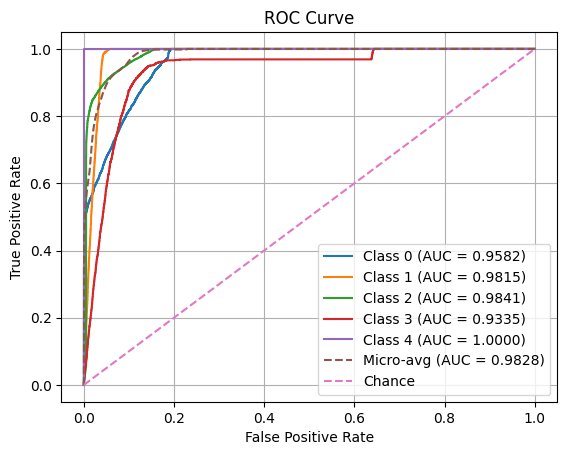

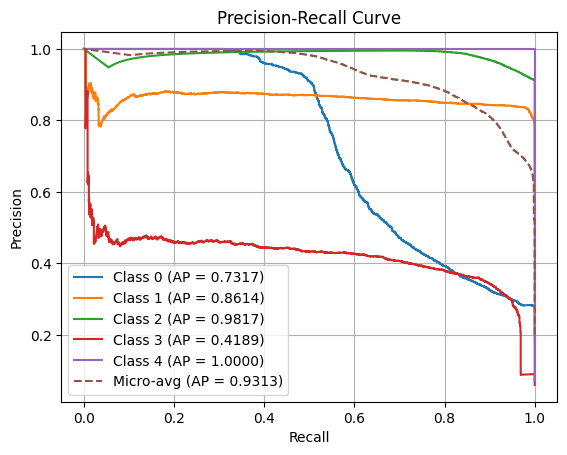

In [ ]:

nb=ImbPipeline([
    ("smote", SMOTE(sampling_strategy="not majority", random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", GaussianNB())
])

nb.fit(X_train, y_train)

y_train_pred = nb.predict(X_train)
y_test_pred  = nb.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy :", test_acc)

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix:\n", cm)

print("\nClassification report:\n", classification_report(y_test, y_test_pred))



print("Macro F1:", f1_score(y_test, y_test_pred, average="macro"))
print("Balanced Acc:", balanced_accuracy_score(y_test, y_test_pred))
print("LogLoss:", log_loss(y_test, nb.predict_proba(X_test)))



cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "acc": "accuracy",
    "bal_acc": make_scorer(balanced_accuracy_score),
    "macro_f1": make_scorer(f1_score, average="macro"),
    "weighted_f1": make_scorer(f1_score, average="weighted"),
    "neg_log_loss": "neg_log_loss"
}

cv_res = cross_validate(nb, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

print("CV Accuracy      :", cv_res["test_acc"].mean(), "+/-", cv_res["test_acc"].std())
print("CV Balanced Acc  :", cv_res["test_bal_acc"].mean(), "+/-", cv_res["test_bal_acc"].std())
print("CV Macro F1      :", cv_res["test_macro_f1"].mean(), "+/-", cv_res["test_macro_f1"].std())
print("CV Weighted F1   :", cv_res["test_weighted_f1"].mean(), "+/-", cv_res["test_weighted_f1"].std())
print("CV LogLoss       :", -cv_res["test_neg_log_loss"].mean(), "+/-", cv_res["test_neg_log_loss"].std())


classes = np.unique(y_train)
proba = nb.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=classes)

n_classes = len(classes)


# ============ ROC CURVE ============

plt.figure()
if n_classes == 2:
    # Use positive class probability (column 1)
    fpr, tpr, _ = roc_curve(y_test, proba[:, 1], pos_label=classes[1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.4f})")
else:
    # Per-class ROC
    for i, c in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {c} (AUC = {roc_auc:.4f})")

    # Micro-average ROC
    fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), proba.ravel())
    auc_micro = auc(fpr_micro, tpr_micro)
    plt.plot(fpr_micro, tpr_micro, linestyle="--", label=f"Micro-avg (AUC = {auc_micro:.4f})")

plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# ============ PR CURVE ============

plt.figure()
if n_classes == 2:
    precision, recall, _ = precision_recall_curve(y_test, proba[:, 1], pos_label=classes[1])
    ap = average_precision_score(y_test == classes[1], proba[:, 1])

    plt.plot(recall, precision, label=f"PR (AP = {ap:.4f})")
else:
    # Per-class PR
    ap_list = []
    for i, c in enumerate(classes):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], proba[:, i])
        ap = average_precision_score(y_test_bin[:, i], proba[:, i])
        ap_list.append(ap)
        plt.plot(recall, precision, label=f"Class {c} (AP = {ap:.4f})")

    # Micro-average PR
    precision_micro, recall_micro, _ = precision_recall_curve(y_test_bin.ravel(), proba.ravel())
    ap_micro = average_precision_score(y_test_bin.ravel(), proba.ravel())
    plt.plot(recall_micro, precision_micro, linestyle="--", label=f"Micro-avg (AP = {ap_micro:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

Train accuracy: 0.8482

Test accuracy: 0.8489

Train and test are almost identical → no overfitting, but performance is also clearly lower than boosting models (CatBoost/XGB/LGB).

Class 0 ↔ 1 confusion is large in both directions (805 and 924).

The biggest error block is Class 2 → Class 3 (2474), meaning NB frequently confuses those two outcomes.

# **MLPClassifier**

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Train accuracy: 0.9437416666666667
Test accuracy : 0.8816333333333334
Confusion matrix:
 [[ 1353   747     0     0     0]
 [  975  4425     0     0     0]
 [    2     1 17424  1173     0]
 [    0     0   653  1147     0]
 [    0     0     0     0  2100]]

Classification report:
               precision    recall  f1-score   support

           0       0.58      0.64      0.61      2100
           1       0.86      0.82      0.84      5400
           2       0.96      0.94      0.95     18600
           3       0.49      0.64      0.56      1800
           4       1.00      1.00      1.00      2100

    accuracy                           0.88     30000
   macro avg       0.78      0.81      0.79     30000
weighted avg       0.89      0.88      0.89     30000

Macro F1: 0.7909602608092635
Balanced Acc: 0.8075453149001536
LogLoss: 0.3815215197006048
CV Accuracy      : 0.8799583333333334 +/- 0.0014329941459134202
CV Balanced Acc  : 0.8078083290663937 +/- 0.00618195342214875
CV Macro F1    

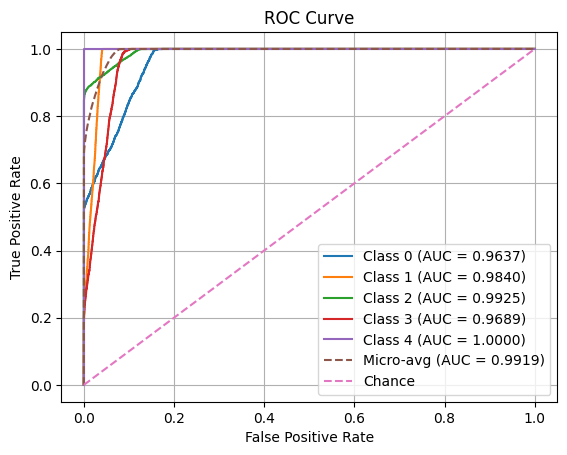

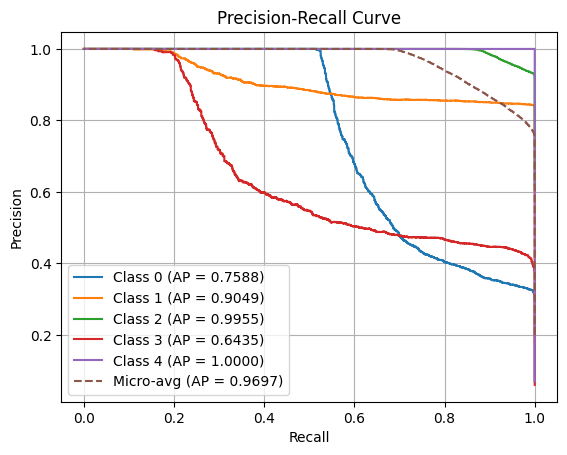

In [ ]:


ann=ImbPipeline([
    ("smote", SMOTE(sampling_strategy="not majority", random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", MLPClassifier(hidden_layer_sizes=(128,64), max_iter=300, random_state=42))
])

ann.fit(X_train, y_train)

y_train_pred = ann.predict(X_train)
y_test_pred  = ann.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy :", test_acc)

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix:\n", cm)

print("\nClassification report:\n", classification_report(y_test, y_test_pred))



print("Macro F1:", f1_score(y_test, y_test_pred, average="macro"))
print("Balanced Acc:", balanced_accuracy_score(y_test, y_test_pred))
print("LogLoss:", log_loss(y_test, ann.predict_proba(X_test)))



cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "acc": "accuracy",
    "bal_acc": make_scorer(balanced_accuracy_score),
    "macro_f1": make_scorer(f1_score, average="macro"),
    "weighted_f1": make_scorer(f1_score, average="weighted"),
    "neg_log_loss": "neg_log_loss"
}

cv_res = cross_validate(ann, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

print("CV Accuracy      :", cv_res["test_acc"].mean(), "+/-", cv_res["test_acc"].std())
print("CV Balanced Acc  :", cv_res["test_bal_acc"].mean(), "+/-", cv_res["test_bal_acc"].std())
print("CV Macro F1      :", cv_res["test_macro_f1"].mean(), "+/-", cv_res["test_macro_f1"].std())
print("CV Weighted F1   :", cv_res["test_weighted_f1"].mean(), "+/-", cv_res["test_weighted_f1"].std())
print("CV LogLoss       :", -cv_res["test_neg_log_loss"].mean(), "+/-", cv_res["test_neg_log_loss"].std())


classes = np.unique(y_train)
proba = ann.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=classes)

n_classes = len(classes)


# ============ ROC CURVE ============

plt.figure()
if n_classes == 2:
    # Use positive class probability (column 1)
    fpr, tpr, _ = roc_curve(y_test, proba[:, 1], pos_label=classes[1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.4f})")
else:
    # Per-class ROC
    for i, c in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {c} (AUC = {roc_auc:.4f})")

    # Micro-average ROC
    fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), proba.ravel())
    auc_micro = auc(fpr_micro, tpr_micro)
    plt.plot(fpr_micro, tpr_micro, linestyle="--", label=f"Micro-avg (AUC = {auc_micro:.4f})")

plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# ============ PR CURVE ============

plt.figure()
if n_classes == 2:
    precision, recall, _ = precision_recall_curve(y_test, proba[:, 1], pos_label=classes[1])
    ap = average_precision_score(y_test == classes[1], proba[:, 1])

    plt.plot(recall, precision, label=f"PR (AP = {ap:.4f})")
else:
    # Per-class PR
    ap_list = []
    for i, c in enumerate(classes):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], proba[:, i])
        ap = average_precision_score(y_test_bin[:, i], proba[:, i])
        ap_list.append(ap)
        plt.plot(recall, precision, label=f"Class {c} (AP = {ap:.4f})")

    # Micro-average PR
    precision_micro, recall_micro, _ = precision_recall_curve(y_test_bin.ravel(), proba.ravel())
    ap_micro = average_precision_score(y_test_bin.ravel(), proba.ravel())
    plt.plot(recall_micro, precision_micro, linestyle="--", label=f"Micro-avg (AP = {ap_micro:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

There is a large gap between train and test → overfitting.
So the network learned training patterns well (possibly memorizing some noise), but it generalizes worse than boosting models.

Class 0 ↔ 1 confusion is still high, in both directions.

Class 2 ↔ 3 confusion remains significant (especially 2 → 3 = 1173).

These are better than KNN/Naive Bayes, but still behind CatBoost/XGB/LGB and also behind RF/DT in some balanced metrics.

# **Precision-focused resampling + Random Forest (BorderlineSMOTE targets)**

In this experiment we tried to control the false positives for Class 3 by changing the sampling strategy instead of blindly oversampling all minorities to the majority size.

In [ ]:

# 1) Build LESS aggressive sampling (Class 3 was too strong)
counts = Counter(y_train)
maj_count = max(counts.values())  # class 2 = 74400

target_frac_other = 0.65
target_frac_c3     = 0.70

sampling_strategy = {}
for c, n in counts.items():
    if n == maj_count:
        continue
    target = int(target_frac_other * maj_count)
    if int(c) == 3:
        target = int(target_frac_c3 * maj_count)
    sampling_strategy[c] = max(n, target)

print("Class counts:", dict(counts))
print("SMOTE targets (precision-focused):", sampling_strategy)

# BorderlineSMOTE for oversampling
smote_resampler = BorderlineSMOTE(
    sampling_strategy=sampling_strategy,
    random_state=42,
    k_neighbors=5
)

# If you also want TomekLinks for cleaning after BorderlineSMOTE, add it as a separate step:
tomek_cleaner = TomekLinks(sampling_strategy='majority')

# 2) Reduce Class 3 weight boost (it was causing false positives)
total = sum(counts.values())
base_w = {c: total / (len(counts) * n) for c, n in counts.items()}
base_w[3] *= 1.5

# 3) Stronger regularization to reduce "class 2 -> class 3" leakage
RFS = ImbPipeline([
    ("resample", smote_resampler),
    ("scaler", StandardScaler()),
    ("clf",  RandomForestClassifier(n_estimators=300, max_depth=12, random_state=42))
])


RFS.fit(X_train, y_train)


y_train_pred = RFS.predict(X_train)
y_test_pred  = RFS.predict(X_test)


print("\nTrain accuracy:", accuracy_score(y_train, y_train_pred))
print("Test accuracy :", accuracy_score(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion matrix:\n", cm)

print("\nClassification report:\n",
      classification_report(y_test, y_test_pred, zero_division=0))

print("Macro F1:", f1_score(y_test, y_test_pred, average="macro"))
print("Balanced Acc:", balanced_accuracy_score(y_test, y_test_pred))
print("LogLoss:", log_loss(y_test, RFS.predict_proba(X_test)))

print("\n--- Class 3 focus ---")
print("Class 3 Precision:", precision_score(y_test, y_test_pred, labels=[3], average="macro", zero_division=0))
print("Class 3 Recall   :", recall_score(y_test, y_test_pred, labels=[3], average="macro", zero_division=0))
print("Class 3 F1       :", f1_score(y_test, y_test_pred, labels=[3], average="macro", zero_division=0))

Class counts: {np.int64(2): 74400, np.int64(4): 8400, np.int64(3): 7200, np.int64(1): 21600, np.int64(0): 8400}
SMOTE targets (precision-focused): {np.int64(4): 48360, np.int64(3): 52080, np.int64(1): 48360, np.int64(0): 48360}

Train accuracy: 0.8765583333333333
Test accuracy : 0.867

Confusion matrix:
 [[ 1394   706     0     0     0]
 [ 1172  4228     0     0     0]
 [    0     0 16552  2048     0]
 [    0     0    64  1736     0]
 [    0     0     0     0  2100]]

Classification report:
               precision    recall  f1-score   support

           0       0.54      0.66      0.60      2100
           1       0.86      0.78      0.82      5400
           2       1.00      0.89      0.94     18600
           3       0.46      0.96      0.62      1800
           4       1.00      1.00      1.00      2100

    accuracy                           0.87     30000
   macro avg       0.77      0.86      0.80     30000
weighted avg       0.91      0.87      0.88     30000

Macro F1: 0.79

Train accuracy: 0.8766

Test accuracy: 0.8670

The close train/test values suggest no severe overfitting, but overall accuracy is lower than your best boosted-tree models (CatBoost / XGB / LGB).

CV Accuracy      : 0.8646083333333333 +/- 0.0027107809452874077
CV Balanced Acc  : 0.8590427547363031 +/- 0.003253863006680949
CV Macro F1      : 0.7923770581697646 +/- 0.003651888425320013
CV Weighted F1   : 0.877175097694003 +/- 0.0023301134849123
CV LogLoss       : 0.26757317484088783 +/- 0.002990730495677101


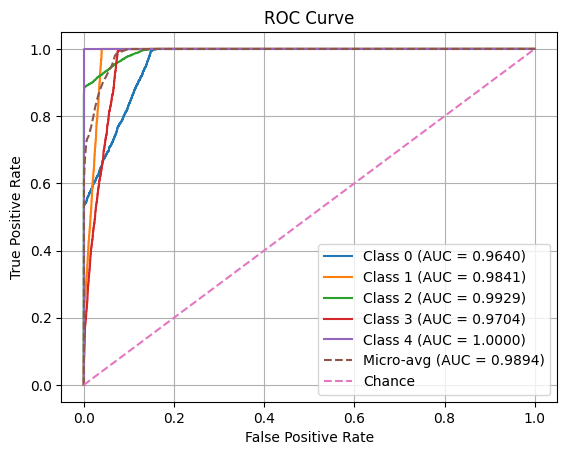

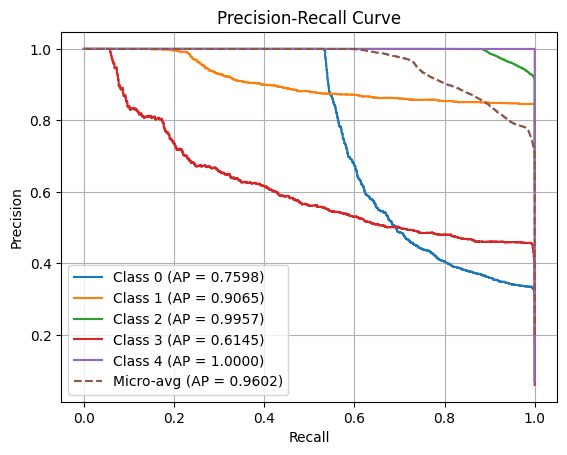

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "acc": "accuracy",
    "bal_acc": make_scorer(balanced_accuracy_score),
    "macro_f1": make_scorer(f1_score, average="macro"),
    "weighted_f1": make_scorer(f1_score, average="weighted"),
    "neg_log_loss": "neg_log_loss"
}

cv_res = cross_validate(RFS, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

print("CV Accuracy      :", cv_res["test_acc"].mean(), "+/-", cv_res["test_acc"].std())
print("CV Balanced Acc  :", cv_res["test_bal_acc"].mean(), "+/-", cv_res["test_bal_acc"].std())
print("CV Macro F1      :", cv_res["test_macro_f1"].mean(), "+/-", cv_res["test_macro_f1"].std())
print("CV Weighted F1   :", cv_res["test_weighted_f1"].mean(), "+/-", cv_res["test_weighted_f1"].std())
print("CV LogLoss       :", -cv_res["test_neg_log_loss"].mean(), "+/-", cv_res["test_neg_log_loss"].std())


classes = np.unique(y_train)
proba = RFS.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=classes)

n_classes = len(classes)


# ============ ROC CURVE ============

plt.figure()
if n_classes == 2:
    # Use positive class probability (column 1)
    fpr, tpr, _ = roc_curve(y_test, proba[:, 1], pos_label=classes[1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.4f})")
else:
    # Per-class ROC
    for i, c in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {c} (AUC = {roc_auc:.4f})")

    # Micro-average ROC
    fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), proba.ravel())
    auc_micro = auc(fpr_micro, tpr_micro)
    plt.plot(fpr_micro, tpr_micro, linestyle="--", label=f"Micro-avg (AUC = {auc_micro:.4f})")

plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# ============ PR CURVE ============

plt.figure()
if n_classes == 2:
    precision, recall, _ = precision_recall_curve(y_test, proba[:, 1], pos_label=classes[1])
    ap = average_precision_score(y_test == classes[1], proba[:, 1])

    plt.plot(recall, precision, label=f"PR (AP = {ap:.4f})")
else:
    # Per-class PR
    ap_list = []
    for i, c in enumerate(classes):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], proba[:, i])
        ap = average_precision_score(y_test_bin[:, i], proba[:, i])
        ap_list.append(ap)
        plt.plot(recall, precision, label=f"Class {c} (AP = {ap:.4f})")

    # Micro-average PR
    precision_micro, recall_micro, _ = precision_recall_curve(y_test_bin.ravel(), proba.ravel())
    ap_micro = average_precision_score(y_test_bin.ravel(), proba.ravel())
    plt.plot(recall_micro, precision_micro, linestyle="--", label=f"Micro-avg (AP = {ap_micro:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

# **Overall comparison table**

| Model                                              |   Test Acc |   Macro F1 | Balanced Acc |                        LogLoss (test) | CV LogLoss |
| -------------------------------------------------- | ---------: | ---------: | -----------: | ------------------------------------: | ---------: |
| **Logistic Regression + SMOTE**                    |     0.8612 |     0.7738 |       0.8061 |                                0.2851 |     0.2879 |
| **LR + Isotonic Calibration**                      |          — |          — |            — |                            **0.2270** |          — |
| **CatBoost + SMOTE**                               |     0.9037 |     0.8282 |       0.8417 | ** | **0.1885** |
| **Decision Tree + SMOTE (depth=10)**               |     0.8952 | **0.8333** |   **0.8798** |                                0.2613 |     0.2630 |
| **Random Forest + SMOTE (300, depth=12)**          |     0.8963 | **0.8343** |       0.8785 |                                0.2496 |     0.2482 |
| **XGBoost + SMOTE**                                |     0.9054 |     0.8205 |       0.8205 |                                0.1833 |     0.1837 |
| **LightGBM + SMOTE**                               | **0.9075** |     0.8158 |       0.8052 |                            **0.1791** | **0.1793** |
| **KNN + SMOTE (k=5)**                              |     0.8401 |     0.7401 |       0.7670 |                                1.6135 |     1.6520 |
| **GaussianNB + SMOTE**                             |     0.8489 |     0.7740 |       0.8260 |                                0.4609 |     0.4693 |
| **MLP (ANN) + SMOTE**                              |     0.8816 |     0.7910 |       0.8075 |                                0.3815 |     0.4544 |
| **“Precision-focused” RFS (BorderlineSMOTE + RF)** |     0.8670 |     0.7955 |       0.8602 |                                0.2579 |     0.2676 |


**Who is best (by goal)
Best accuracy**

.     LightGBM (0.9075) slightly highest

.     XGBoost (0.9054) close

.     CatBoost (0.9037) close

**Best balanced performance across classes (Macro F1 / Balanced Acc)**

.     Random Forest / Decision Tree are strongest on Balanced Acc (~0.88)

.     Random Forest has the top Macro F1 (~0.834), very close to Decision Tree

.     CatBoost is the best “boosting-style” model for balanced classification (Macro F1 ~0.828, Balanced Acc ~0.842)

**Best probability quality (LogLoss)**

.     LightGBM best (≈ 0.179)

.     XGBoost next (≈ 0.183)

.     CatBoost next (CV ≈ 0.189)

.     Logistic Regression improved a lot after calibration (0.227) but still behind boosting.